In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib nbagg

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (8,7)

<h1>Performance Evaluation</h1>
<p>In the present notebook we will introduce metrics to evaluate a classifier performance but also common practices when it comes to test the robustness of machine learning algorithms.</p>

In [88]:
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()
X = dataset.data[:,:10]
y = dataset.target
tgt = list(dataset.target_names)

<h2>Train-Test Spliting</h2>

<p>We can first try to see the difference when using this approach on the iris classification problem</p>

In [66]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

knn = KNeighborsClassifier()
dtc = DecisionTreeClassifier()
rft = RandomForestClassifier()
etc = ExtraTreesClassifier()

In [68]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

             precision    recall  f1-score   support

  malignant       0.92      0.83      0.87       212
     benign       0.90      0.96      0.93       357

avg / total       0.91      0.91      0.91       569



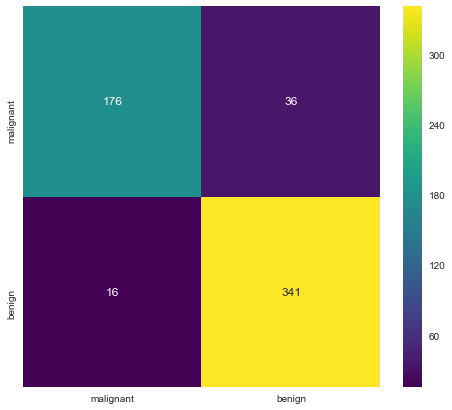

In [91]:
knn.fit(X,y)
pred_knn = knn.predict(X)

print(classification_report(y_true=y, y_pred=pred_knn, target_names=tgt))

_ = sns.heatmap(confusion_matrix(y_true=y, y_pred=pred_knn),
                xticklabels=tgt, yticklabels=tgt,
                annot=True, fmt='d', cmap='viridis')

In [93]:
acc = cross_val_score(knn, X[:,:10], y, scoring='accuracy', cv=3)
print(acc)
print('Average accuracy : {}'.format(np.mean(acc)))

[ 0.83157895  0.88947368  0.88359788]
Average accuracy : 0.8682168383922769


             precision    recall  f1-score   support

  malignant       1.00      1.00      1.00       212
     benign       1.00      1.00      1.00       357

avg / total       1.00      1.00      1.00       569



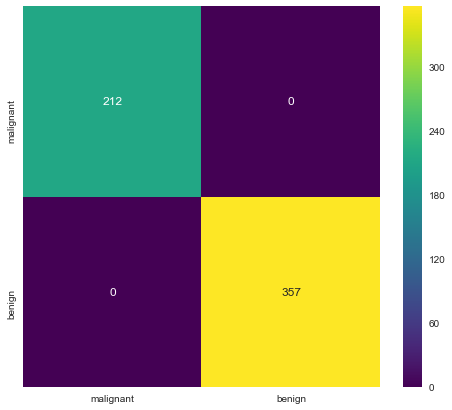

In [94]:
dtc.fit(X,y)
pred_dtc = dtc.predict(X)

print(classification_report(y_true=y, y_pred=pred_dtc, target_names=tgt))

_ = sns.heatmap(confusion_matrix(y_true=y, y_pred=pred_dtc),
                xticklabels=tgt, yticklabels=tgt,
                annot=True, fmt='d', cmap='viridis')

In [95]:
acc = cross_val_score(dtc, X[:,:10], y, scoring='accuracy', cv=3)
print(acc)
print('Average accuracy : {}'.format(np.mean(acc)))

[ 0.92631579  0.92105263  0.93121693]
Average accuracy : 0.9261951174231875
